In [6]:
# Import dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
# Loading the preprocessed cannabis dataset
file_path = Path("cannabis_sample_data.csv")
df_cannabis = pd.read_csv(file_path)
df_cannabis.head()

,strain_type,chemo_type,thc_max,cbd_max
0,1,1,20.13,0.54
1,2,1,13.50,0.00
2,1,1,9.91,0.00
3,0,1,10.81,0.00
4,2,1,11.67,0.00


C:\Users\jemis\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


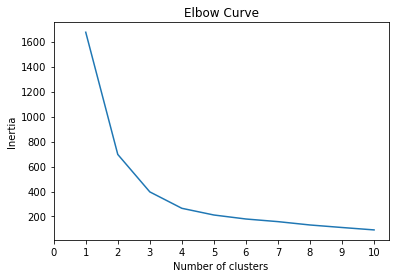

In [8]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_cannabis)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
# Predicting clusters with k=4

# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=72)

# Fit the model
model.fit(df_cannabis)

# Predict clusters
predictions = model.predict(df_cannabis)

# Add the predicted class column to the dataframe
df_cannabis["class"] = model.labels_
df_cannabis.head()

,strain_type,chemo_type,thc_max,cbd_max,class
0,1,1,20.13,0.54,2
1,2,1,13.50,0.00,1
2,1,1,9.91,0.00,1
3,0,1,10.81,0.00,1
4,2,1,11.67,0.00,1


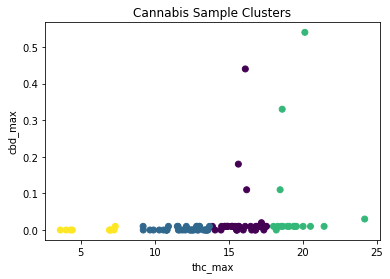

In [11]:
# Visualize the clusters
plt.scatter(x=df_cannabis['thc_max'], y=df_cannabis["cbd_max"], c=df_cannabis['class'])
plt.xlabel('thc_max')
plt.ylabel('cbd_max')
plt.title('Cannabis Sample Clusters')
plt.show()